In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Boltzmann constant in kJ/mol
kb = 1.38064852e-23
# Planck's constant
h = 6.62607004e-34
# Avogadro's number
NA = 6.0221409e23
# Speed of light
c = 299792458

In [16]:
#Constant data
# N2
N2mass = 14.007*2 
N2symmetry = 2
N2rotational  = 1.99824*h*c*100
N2vibrational = 2330 * 100 * c	
N2energy = -944.46

# H2
H2mass = 2.016
H2symmetry = 2
H2rotational = 60.853*h*c*100
H2vibrational = 4401.21 * 100 * c
H2energy = -456.75

#NH3
NH3mass = 17.031
NH3symmetry = 6
NH3rotational1 = 9.44430*h*c*100
NH3rotational2 = 9.44430*h*c*100
NH3rotational3 = 6.19600*h*c*100
lamb1NH3 = 3337 *100 *c
lamb2NH3 = 950 * 100 * c
lamb3NH3 = 3444 * 100 * c
lamb4NH3 = 1627 * 100 * c
NH3energy = -1243.44


In [27]:
#trans part func
def translational(temp):
    zN2 = (((2 * np.pi * (N2mass/(1000*NA)) * kb * temp)**.5)/h)**3 
    zH2 = (((2 * np.pi * (H2mass/(1000*NA)) * kb * temp)**.5)/h)**3
    zNH3 = (((2 * np.pi * (NH3mass/(1000*NA)) * kb * temp)**.5)/h)**3 
    ktrans = (zNH3 / (((zN2)**.5) * ((zH2)**1.5))) * 6.022e26
    return ktrans

trial800 = translational(800)
print(trial800)

0.00016878385376018415


In [34]:
#rot part func
def rotational(temp):
    zN2 = (kb * temp)/(N2symmetry * N2rotational)
    zH2 = (kb * temp)/(H2symmetry * H2rotational)
    zNH3 = (((np.pi)**.5)/NH3symmetry) * ((((kb * temp)**3)/(NH3rotational1 * NH3rotational2 * NH3rotational3))**.5)
    krot = zNH3 / (((zN2)**.5) * ((zH2)**1.5))
    return krot

trialrot800 = rotational(800) 
print(trialrot800)

1.4303977430157733


In [35]:
#vib part func
def vibrational(temp):
    vibTN2 = (h * N2vibrational)/kb
    vibTH2 = (h * H2vibrational)/kb
    vib1TNH3 = (h * lamb1NH3)/kb
    vib2TNH3 = (h * lamb2NH3)/kb
    vib3TNH3 = (h * lamb3NH3)/kb
    vib4TNH3 = (h * lamb4NH3)/kb
    zN2 = (np.exp(-1 * vibTN2/(2 * temp)))/(1 - np.exp(-vibTN2/temp))
    zH2 = (np.exp(-1 * vibTH2/(2 * temp)))/(1 - np.exp(-vibTH2/temp))
    zNH3 =(np.exp(-1 * vib1TNH3/(2 * temp)))/(1 - np.exp(-vib1TNH3/temp)) * (np.exp(-vib2TNH3/(2 * temp)))/(1 - np.exp(-vib2TNH3/temp)) * (np.exp(-vib3TNH3/(2 * temp)))/(1 - np.exp(-vib3TNH3/temp)) * (np.exp(-vib4TNH3/(2 * temp)))/(1 - np.exp(-vib4TNH3/temp))
    kvib = zNH3 / (((zN2)**.5) * ((zH2)**1.5))
    return kvib

In [36]:
#elec part func
def electronic(temp):
    zN2 = np.exp((-1 * N2energy*1000) /(kb * temp * NA))
    zH2 = np.exp((-1 * H2energy*1000) /(kb * temp * NA))
    zNH3 = np.exp((-1 * NH3energy*1000) /(kb * temp * NA))
    kelec = zNH3 / (((zN2)**.5) * ((zH2)**1.5))
    return kelec

In [37]:
def partfunct(temp):
    ztrans = translational(temp)
    zrot = rotational(temp)
    zvib = vibrational(temp)
    zelec = electronic(temp)
    keq = ztrans * zrot * zvib * zelec
    logkeq = np.log10(keq)
    return logkeq

In [38]:
def haber(temp):
    logkeq = 2.1 + (2098/temp) - 2.5088*np.log10(temp) - 1.006e-4*temp + 1.86e-7*(temp**2) + np.log10(0.0821*temp)
    return logkeq

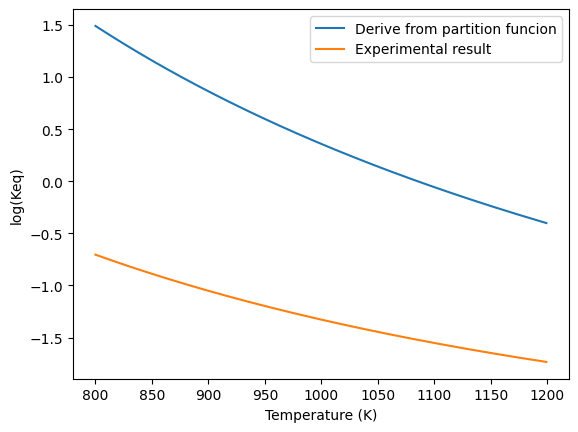

In [41]:
#1d
tempArray = np.arange(800, 1200, 1)
partfuncarray = partfunct(tempArray)
haberarray = haber(tempArray)

fig, ax = plt.subplots()
ax.plot(tempArray, partfuncarray, label = 'Derive from partition funcion')
ax.plot(tempArray, haberarray, label = 'Experimental result')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('log(Keq)')
ax.legend()

plt.show()

At low temperature, the experimental k is lower because the kinetic effect is more important. 